In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

notebook to plot average attenuation spectra

In [9]:
# pass combined df with labels
# (Matplotlib, 2023)
def plot_avg_spectra(df, title, filename=None):
    squamous = df.loc[df['label']==1].reset_index(drop=True)
    ndbe = df.loc[df['label']==2].reset_index(drop=True)
    neoplasia = df.loc[df['label']==3].reset_index(drop=True)

    mean1 = squamous.mean().to_frame().transpose().drop('label', axis=1)
    mean2 = ndbe.mean().to_frame().transpose().drop('label', axis=1)
    mean3 = neoplasia.mean().to_frame().transpose().drop('label', axis=1)

    # remove column names
    mean1.columns = range(433)
    mean2.columns = range(433)
    mean3.columns = range(433)

    fig, ax = plt.subplots()
    ax.plot(range(433), mean1.loc[0].values.tolist(), linewidth=2.0, color='red', label='squamous')
    ax.plot(range(433), mean2.loc[0].values.tolist(), linewidth=2.0, color='green', label='ndbe')
    ax.plot(range(433), mean3.loc[0].values.tolist(), linewidth=2.0, color='blue', label='neoplasia')
    ax.legend()
    plt.xlabel('wavelength (ignore)')
    plt.ylabel('attenuation')
    plt.title(title)
    if filename!=None:
        plt.savefig(f"{filename}")
    plt.show()
    return 

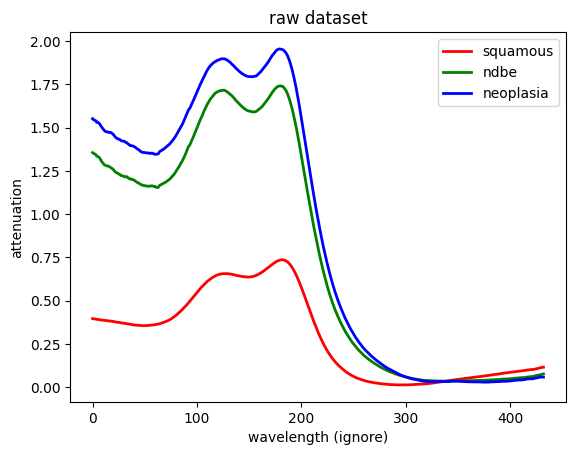

In [11]:
# avg attenuation for raw DS
combined = pd.read_csv('combined.csv', index_col=0).reset_index(drop=True)
# print(combined['label'].value_counts())
plot_avg_spectra(combined, title='raw dataset', filename='original_data/spectraplot.png')


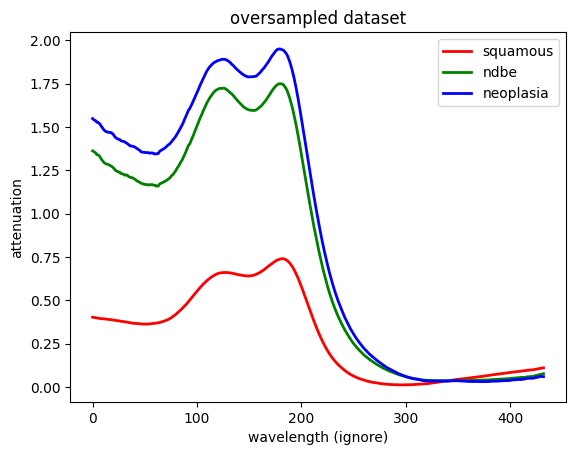

In [10]:
# avg attenuation for augmented DS (oversampled)
x_train = pd.read_csv('augmented_data/train_data.csv', header=None)
y_train = pd.read_csv('augmented_data/train_label.csv', header=None, names=['label'])
merged = pd.merge(x_train, y_train, left_index=True, right_index=True)

plot_avg_spectra(merged, title='oversampled dataset', filename='augmented_data/spectraplot.png')

750


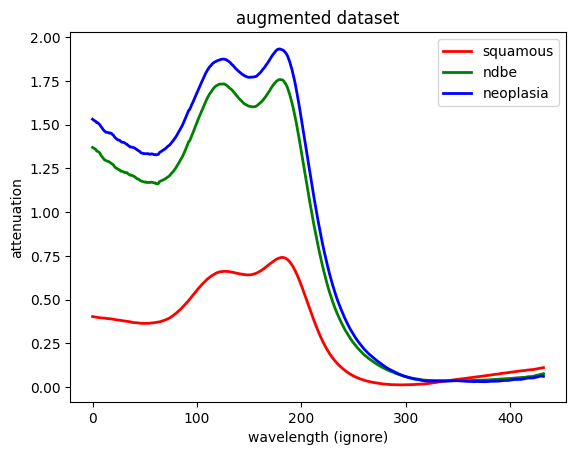

In [12]:
# avg attenuation for augmented DS (augmented v2)
x_train = pd.read_csv('augmented_datav2/train_data.csv', header=None)
y_train = pd.read_csv('augmented_datav2/train_label.csv', header=None, names=['label'])
merged = pd.merge(x_train, y_train, left_index=True, right_index=True)
print(len(merged))

plot_avg_spectra(merged, title='augmented dataset', filename='augmented_datav2/spectraplot.png')